# IMBD Movies Data Analysis....

In [1]:
import numpy as np
import pandas as pd

In [2]:
movie = pd.read_csv("IMDB_Movie_Data.csv")

In [3]:
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
movie.shape

(1000, 12)

In [5]:
movie.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rank,1000.0,500.500000,288.819436,1.0,250.75,500.500,750.250,1000.00
Year,1000.0,2012.783000,3.205962,2006.0,2010.00,2014.000,2016.000,2016.00
Runtime (Minutes),1000.0,113.172000,18.810908,66.0,100.00,111.000,123.000,191.00
Rating,1000.0,6.723200,0.945429,1.9,6.20,6.800,7.400,9.00
Votes,1000.0,169808.255000,188762.647518,61.0,36309.00,110799.000,239909.750,1791916.00
Revenue (Millions),872.0,82.956376,103.253540,0.0,13.27,47.985,113.715,936.63
Metascore,936.0,58.985043,17.194757,11.0,47.00,59.500,72.000,100.00


In [6]:
movie.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [7]:
perct_mis_val = round(100*(movie.isnull().sum()/len(movie.index)),2)
print(perct_mis_val)

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64


* Handle the missing value columns with the proper assumtion.

In [8]:
movie['Revenue (Millions)'] = movie['Revenue (Millions)'].fillna(movie['Revenue (Millions)'].mean())
movie['Metascore'] = movie['Metascore'].fillna(movie['Metascore'].mean())

In [9]:
movie.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

* Rename the columns for the analysis purpose if any columns are not in proper way.

In [10]:
movie.rename(columns={"Runtime (Minutes)":'Runtime','Revenue (Millions)':'Revenue'})

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130000,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460000,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120000,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320000,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.020000,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,82.956376,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.540000,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.010000,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,82.956376,22.0


* Generate the relationship between each continuous variable using corr() method.

In [11]:
movie.corr()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.185159
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.076077
Runtime (Minutes),-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.202239
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.604723
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.318116
Revenue (Millions),-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.132304
Metascore,-0.185159,-0.076077,0.202239,0.604723,0.318116,0.132304,1.000000


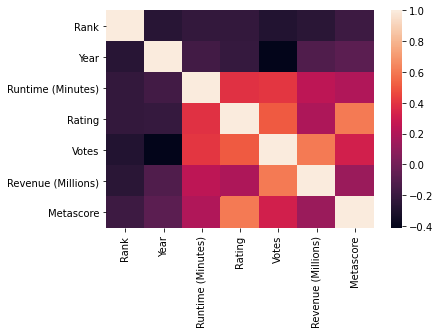

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(movie.corr())

* Find the movies directed by 'James Gunn', & 'Ridley Scott' with the rating greater than or equal to 8.

In [13]:
movie['Director']

0                James Gunn
1              Ridley Scott
2        M. Night Shyamalan
3      Christophe Lourdelet
4                David Ayer
               ...         
995               Billy Ray
996                Eli Roth
997              Jon M. Chu
998          Scot Armstrong
999        Barry Sonnenfeld
Name: Director, Length: 1000, dtype: object

In [14]:
movie.loc[(movie['Director']=='James Gunn')]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
908,909,Slither,"Comedy,Horror,Sci-Fi","A small town is taken over by an alien plague,...",James Gunn,"Nathan Fillion, Elizabeth Banks, Michael Rooke...",2006,95,6.5,64351,7.77,69.0
937,938,Super,"Comedy,Drama",After his wife falls under the influence of a ...,James Gunn,"Rainn Wilson, Ellen Page, Liv Tyler, Kevin Bacon",2010,96,6.8,64535,0.32,50.0


* movie.loc[(movie['Director']=='Ridley Scott'),['Rating']>=8]

In [15]:
movie.loc[(movie['Director']=='Ridley Scott')]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
102,103,The Martian,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
387,388,Robin Hood,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
470,471,American Gangster,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
516,517,Exodus: Gods and Kings,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0
521,522,The Counselor,"Crime,Drama,Thriller",A lawyer finds himself in over his head when h...,Ridley Scott,"Michael Fassbender, Penélope Cruz, Cameron Dia...",2013,117,5.3,84927,16.97,48.0
530,531,A Good Year,"Comedy,Drama,Romance",A British investment broker inherits his uncle...,Ridley Scott,"Russell Crowe, Abbie Cornish, Albert Finney, M...",2006,117,6.9,74674,7.46,47.0
737,738,Body of Lies,"Action,Drama,Romance",A CIA agent on the ground in Jordan hunts down...,Ridley Scott,"Leonardo DiCaprio, Russell Crowe, Mark Strong,...",2008,128,7.1,182305,39.38,57.0


* Display all the director's who got the rating >= 8 for their movies.

In [16]:
movie.loc[(movie['Rating'] >= 8),['Director','Title']]

,Director,Title
0,James Gunn,Guardians of the Galaxy
6,Damien Chazelle,La La Land
16,Mel Gibson,Hacksaw Ridge
18,Garth Davis,Lion
19,Denis Villeneuve,Arrival
...,...,...
742,Juan José Campanella,El secreto de sus ojos
765,Rajkumar Hirani,PK
772,Dean DeBlois,How to Train Your Dragon
861,Naoko Yamada,Koe no katachi


* Find all the movies directed by 'James Gunn', & 'Ridley Scott'.

In [17]:
movie.loc[(movie['Director']=='James Gunn'),['Title']]

,Title
0,Guardians of the Galaxy
908,Slither
937,Super


In [18]:
movie.loc[(movie['Director']=='Ridley Scott'),['Title']]

,Title
1,Prometheus
102,The Martian
387,Robin Hood
470,American Gangster
516,Exodus: Gods and Kings
521,The Counselor
530,A Good Year
737,Body of Lies


In [19]:
movie.loc[(movie['Director']=='James Gunn') | (movie['Director']=='Ridley Scott')]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
102,103,The Martian,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
387,388,Robin Hood,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
470,471,American Gangster,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
516,517,Exodus: Gods and Kings,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0
521,522,The Counselor,"Crime,Drama,Thriller",A lawyer finds himself in over his head when h...,Ridley Scott,"Michael Fassbender, Penélope Cruz, Cameron Dia...",2013,117,5.3,84927,16.97,48.0
530,531,A Good Year,"Comedy,Drama,Romance",A British investment broker inherits his uncle...,Ridley Scott,"Russell Crowe, Abbie Cornish, Albert Finney, M...",2006,117,6.9,74674,7.46,47.0
737,738,Body of Lies,"Action,Drama,Romance",A CIA agent on the ground in Jordan hunts down...,Ridley Scott,"Leonardo DiCaprio, Russell Crowe, Mark Strong,...",2008,128,7.1,182305,39.38,57.0
908,909,Slither,"Comedy,Horror,Sci-Fi","A small town is taken over by an alien plague,...",James Gunn,"Nathan Fillion, Elizabeth Banks, Michael Rooke...",2006,95,6.5,64351,7.77,69.0


* Display all the movies with the ratings between 8 & 9 and also the films with the highest rating.

In [20]:
movie.loc[(movie['Rating']>=8) & (movie['Rating']<=9)]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130000,76.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.060000,93.0
16,17,Hacksaw Ridge,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,67.120000,71.0
18,19,Lion,"Biography,Drama",A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016,118,8.1,102061,51.690000,69.0
19,20,Arrival,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.500000,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...
742,743,El secreto de sus ojos,"Drama,Mystery,Romance",A retired legal counselor writes a novel hopin...,Juan José Campanella,"Ricardo Darín, Soledad Villamil, Pablo Rago,Ca...",2009,129,8.2,144524,20.170000,80.0
765,766,PK,"Comedy,Drama,Romance",A stranger in the city asks questions no one h...,Rajkumar Hirani,"Aamir Khan, Anushka Sharma, Sanjay Dutt,Boman ...",2014,153,8.2,103279,10.570000,51.0
772,773,How to Train Your Dragon,"Animation,Action,Adventure",A hapless young Viking who aspires to hunt dra...,Dean DeBlois,"Jay Baruchel, Gerard Butler,Christopher Mintz-...",2010,98,8.1,523893,217.390000,74.0
861,862,Koe no katachi,"Animation,Drama,Romance","The story revolves around Nishimiya Shoko, a g...",Naoko Yamada,"Miyu Irino, Saori Hayami, Aoi Yuki, Kenshô Ono",2016,129,8.4,2421,82.956376,80.0


In [21]:
highest_rat = movie['Rating'].max()
highest_rat

9.0

In [22]:
movie.loc[(movie["Rating"]==highest_rat)]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


* Find the movies directed by both 'Christopher Nolan' and 'Ridley Scott'

In [23]:
movie.loc[(movie['Director']=='Christopher Nolan') | (movie['Director']=='Ridley Scott')]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
102,103,The Martian,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
387,388,Robin Hood,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
470,471,American Gangster,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
516,517,Exodus: Gods and Kings,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0


* Find all movies that were released between 2006 and 2010, have a rating above 8.0, but made below the 50th percentile in revenue.

In [24]:
movie.loc[(movie['Year']>=2006) & (movie["Year"]<=2010) & (movie['Rating']>8)]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.320000,82.000000
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.080000,66.000000
77,78,Inglourious Basterds,"Adventure,Drama,War","In Nazi-occupied France during World War II, a...",Quentin Tarantino,"Brad Pitt, Diane Kruger, Eli Roth,Mélanie Laurent",2009,153,8.3,959065,120.520000,69.000000
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.570000,74.000000
99,100,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.370000,85.000000
136,137,No Country for Old Men,"Crime,Drama,Thriller",Violence and mayhem ensue after a hunter stumb...,Ethan Coen,"Tommy Lee Jones, Javier Bardem, Josh Brolin, W...",2007,122,8.1,660286,74.270000,91.000000
138,139,Shutter Island,"Mystery,Thriller","In 1954, a U.S. marshal investigates the disap...",Martin Scorsese,"Leonardo DiCaprio, Emily Mortimer, Mark Ruffal...",2010,138,8.1,855604,127.970000,63.000000
197,198,Into the Wild,"Adventure,Biography,Drama","After graduating from Emory University, top st...",Sean Penn,"Emile Hirsch, Vince Vaughn, Catherine Keener, ...",2007,148,8.1,459304,18.350000,73.000000
230,231,Pan's Labyrinth,"Drama,Fantasy,War","In the falangist Spain of 1944, the bookish yo...",Guillermo del Toro,"Ivana Baquero, Ariadna Gil, Sergi López,Maribe...",2006,118,8.2,498879,37.620000,98.000000
299,300,There Will Be Blood,"Drama,History","A story of family, religion, hatred, oil and m...",Paul Thomas Anderson,"Daniel Day-Lewis, Paul Dano, Ciarán Hinds,Mart...",2007,158,8.1,400682,40.220000,92.000000


In [25]:
movie[(movie['Year']>=2006) & (movie["Year"]<=2010) & (movie['Rating']>8) & 
      (movie['Revenue (Millions)'] < movie['Revenue (Millions)'].quantile(0.50))]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
197,198,Into the Wild,"Adventure,Biography,Drama","After graduating from Emory University, top st...",Sean Penn,"Emile Hirsch, Vince Vaughn, Catherine Keener, ...",2007,148,8.1,459304,18.35,73.0
230,231,Pan's Labyrinth,"Drama,Fantasy,War","In the falangist Spain of 1944, the bookish yo...",Guillermo del Toro,"Ivana Baquero, Ariadna Gil, Sergi López,Maribe...",2006,118,8.2,498879,37.62,98.0
299,300,There Will Be Blood,"Drama,History","A story of family, religion, hatred, oil and m...",Paul Thomas Anderson,"Daniel Day-Lewis, Paul Dano, Ciarán Hinds,Mart...",2007,158,8.1,400682,40.22,92.0
430,431,3 Idiots,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
476,477,The Lives of Others,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
713,714,Incendies,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
742,743,El secreto de sus ojos,"Drama,Mystery,Romance",A retired legal counselor writes a novel hopin...,Juan José Campanella,"Ricardo Darín, Soledad Villamil, Pablo Rago,Ca...",2009,129,8.2,144524,20.17,80.0
991,992,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


* Find all movies that were released between 2006 and 2010, have a rating above 8.0, but made below the 25th percentile in revenue.

In [26]:
movie[(movie['Year']>=2006) & (movie["Year"]<=2010) & (movie['Rating']>8) & 
      (movie['Revenue (Millions)'] < movie['Revenue (Millions)'].quantile(0.25))]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
430,431,3 Idiots,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
476,477,The Lives of Others,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
713,714,Incendies,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
991,992,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


* Finally give the feedback for all movies with 'Good' if the movie 'rating' is >= 8 and 'Average' if the movie rating doesn't follow the condition given.

In [27]:
def rat_feedback(rating):
    if rating >= 8:
        return 'Good Movie'
    else:
        return 'Average Movie'

In [28]:
movie['feedback'] = movie['Rating'].apply(rat_feedback)

In [29]:
movie.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,feedback
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130000,76.0,Good Movie
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460000,65.0,Average Movie
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120000,62.0,Average Movie
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320000,59.0,Average Movie
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.020000,40.0,Average Movie
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.130000,42.0,Average Movie
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.060000,93.0,Good Movie
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,82.956376,71.0,Average Movie
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.010000,78.0,Average Movie
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.010000,41.0,Average Movie
